# Natural Language Processing

1. You are to build a simple sentiment detector that would be able to classify a customer feedback as negative or positive. This is to allow the business to plan how they can improve their customer service.
2. A dataset has been created from customer feedback. It contains the extracted text reviews from customers and each review is labelled with positive or negative sentiment.
3. Complete the task as listed in the requirements below.
4. For Jupyter Notebook, libraries declaration please use "tensorflow.keras.xxx". 



### Install Libraries

Complete the missing import statements.

In [1]:


# import pandas
import pandas as pd
pd.set_option('display.max_colwidth', 200)

#fill in function for train test split.
from sklearn.model_selection import train_test_split

#Use the Sequential class. 
from keras.models import Sequential

#Select the correct crossentropy function for the task.
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense
 
from numpy import argmax
import numpy as np
import re

import matplotlib.pyplot as plt
#Use confusion matrix  and classification report from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

## Install Data

1. Load the dataset **'amazon_cells_labelled.csv'** into a Pandas Dataframe.

2. Set the columns names to 'Review' and 'Sentiment'.


In [2]:
COLUMN_NAMES=['Review','Sentiment']

df = pd.read_csv('amazon_cells_labelled.csv')


## Show the first 10 rows of data

In [3]:
#fill in answer
df.head(10)

,Review,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


## Show count of each sentiment types

In [4]:
#fill in answer
df.Sentiment.value_counts()

Sentiment
0    500
1    500
Name: count, dtype: int64

## Create a **clean()** function to do the following preprocessing:

1. Use regex sub() function to match any non-word character and substitute with empty string ' '.
2. For a given text, replace: 
    * 'don't' with 'do not'
    * 'won't' with 'will not'


In [5]:

def clean(text):
    text = text.replace("don't", "do not")
    text = text.replace("won't", "will not")
    text = re.sub(r'\W+', ' ', text)
    return text

In [6]:
df.Review = df.Review.apply(clean)
df.head()

,Review,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter,0
1,Good case Excellent value,1
2,Great for the jawbone,1
3,Tied to charger for conversations lasting more than 45 minutes MAJOR PROBLEMS,0
4,The mic is great,1


## Assign X to 'Reviews' of amazon_reviews. And Y to 'Sentiment' of amazon_reviews.

In [7]:
X=df.Review
Y=df.Sentiment

## Create Document Vectors

In [11]:
vectorizer = CountVectorizer()

X_encoded = vectorizer.fit_transform(X).toarray()

In [12]:
len(X_encoded)

1000

In [13]:
y_encoded = pd.get_dummies(Y).values

## Split into train, test sets. 70% for training, 30% for testing. 

1. Use the train_test_split() function. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3)

In [15]:
num_epochs=60
model = Sequential()
model.add(Dense(units=64, activation='relu',
                input_dim=X_encoded.shape[1] ))

model.add(Dense(units=2,
                activation='sigmoid'))
model.compile(loss=categorical_crossentropy,
              metrics=['acc'],
              optimizer=SGD(lr=0.01,
                            momentum=0.9, nesterov=True))
history=model.fit(np.array(X_train), np.array(y_train), 
                  epochs=num_epochs, 
                  batch_size=16,
                  validation_data=(X_test, y_test),
                  verbose=1)

Epoch 1/60


c:\Users\midzi\anaconda3\envs\nlpe\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


44/44 [==============================] - 1s 8ms/step - loss: 0.6714 - acc: 0.6000 - val_loss: 0.6443 - val_acc: 0.6900
Epoch 2/60
44/44 [==============================] - 0s 3ms/step - loss: 0.5825 - acc: 0.7814 - val_loss: 0.5893 - val_acc: 0.6500
Epoch 3/60
44/44 [==============================] - 0s 3ms/step - loss: 0.4944 - acc: 0.8157 - val_loss: 0.5348 - val_acc: 0.7467
Epoch 4/60
44/44 [==============================] - 0s 2ms/step - loss: 0.4093 - acc: 0.8743 - val_loss: 0.5026 - val_acc: 0.7667
Epoch 5/60
44/44 [==============================] - 0s 2ms/step - loss: 0.3356 - acc: 0.9229 - val_loss: 0.4759 - val_acc: 0.7867
Epoch 6/60
44/44 [==============================] - 0s 2ms/step - loss: 0.2743 - acc: 0.9429 - val_loss: 0.4694 - val_acc: 0.7900
Epoch 7/60
44/44 [==============================] - 0s 4ms/step - loss: 0.2225 - acc: 0.9657 - val_loss: 0.4687 - val_acc: 0.8067
Epoch 8/60
44/44 [==============================] - 0s 2ms/step - loss: 0.1830 - acc: 0.9800 - val_lo

## Show the learning curves

1. Loss vs Epoch (training and validation)
2. Accuracy vs Epoch (training and validation)

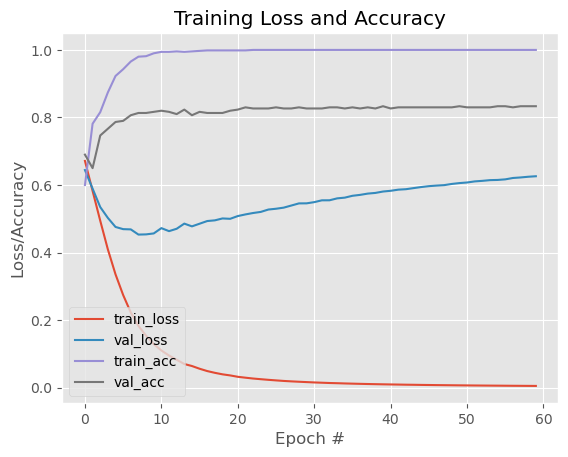

In [16]:
def plot_graphs(H, metric):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history['loss'], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history['val_loss'], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history['acc'], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history['val_acc'], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #" )
  plt.ylabel("Loss/Accuracy" )
  plt.legend()
  plt.savefig("model history")
  plt.show( )
plot_graphs(history,'acc')

## Use model to predict 'X_test'.

In [17]:
preds = model.predict(X_test)

10/10 [==============================] - 0s 9ms/step


## Use argmax() to get the highest probability class label from preds. 

In [18]:
preds=[argmax(each) for each in preds]

## Use argmax() to get the class label from y_test.



In [19]:
y_test_cm= [argmax(each) for each in y_test]


## Show Confusion Matrix 

Use sklearn's confusion_matrix function to create a confusion matrix. 

With the confusion matrix, create a pandas dataframe with columns called 'Negative' and 'Positive', and the index as 'Negative', 'Positive' as well.

In [20]:
cm = confusion_matrix(y_test_cm, preds)
df_cm = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
df_cm.head()

,Negative,Positive
Negative,134,22
Positive,28,116


## Show Classification Report

In [21]:
print(classification_report(y_test_cm, preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       156
           1       0.84      0.81      0.82       144

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



### Make Prediction On New Text Reviews

Write an appropriate code to predict whether the following text reviews are positive or negative and provide the probability in %.
1. 'I love this movie.'
2. 'This show is the worst show in the century.'

In [22]:
newPositiveText='I love this movie.'
newNegativeText='This show is the worst show in the century.'


In [23]:
def encode_new_sentence(sentence):
    sentence=clean(sentence)
    sentence_encoded = vectorizer.transform([sentence]).toarray()
    return sentence_encoded

In [24]:
def predict_results(sentence_encoded):
    predictions = model.predict(sentence_encoded)
    prediction_class = np.argmax(predictions)
    print('The prediction is: ', predictions)
    print("The predictiion class is: ", prediction_class)

    if prediction_class == 0:
        print("The result is negative")
    else:
        print("The result is positive")

topredNeg =  encode_new_sentence(newNegativeText)
topredPos = encode_new_sentence(newPositiveText)

print("negative text:")
predict_results(topredNeg)

print("\npositive text:")
predict_results(topredPos)

negative text:
1/1 [==============================] - 0s 23ms/step
The prediction is:  [[0.9719581  0.02632627]]
The predictiion class is:  0
The result is negative

positive text:
1/1 [==============================] - 0s 23ms/step
The prediction is:  [[0.05029382 0.9333242 ]]
The predictiion class is:  1
The result is positive
